In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [6]:
df.reset_index(drop=True, inplace=True)
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [21]:
modified_df = df[['acc_x', 'acc_y', 'label']]
modified_df.to_csv('../data/interim/lr_data.csv', index=False)




In [16]:
X = df[['acc_x', 'acc_y']]
y = df['label']

In [17]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)


Test Accuracy: 0.6914539400665927
Coefficients: [[ -1.14518628  13.51813643]
 [ -5.47661958 -11.02324439]
 [-14.43584128   9.76882176]
 [ 17.30478017  -5.71429182]
 [ -6.9986873  -10.97140532]
 [ 10.75155427   4.42198333]]
Intercept: [-7.39954187  7.94093756 -0.54383266 -3.35909739  8.41288098 -5.05134663]


/var/folders/jp/j70p3r910ggdm8_69_fxqc080000gn/T/ipykernel_52117/1625908308.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y=='bench']['acc_x'], X[y=='bench']['acc_y'], label='bench', cmap='viridis', edgecolors='k', alpha=0.6)
/var/folders/jp/j70p3r910ggdm8_69_fxqc080000gn/T/ipykernel_52117/1625908308.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y=='dead']['acc_x'], X[y=='dead']['acc_y'], label='dead', cmap='viridis', edgecolors='k', alpha=0.6)
/var/folders/jp/j70p3r910ggdm8_69_fxqc080000gn/T/ipykernel_52117/1625908308.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y=='ohp']['acc_x'], X[y=='ohp']['acc_y'], label='ohp', cmap='viridis', edgecolors='k', alpha=0.6)
/var/folders/jp/j70p3r910ggdm8_69_fxqc080000gn/T/ipykernel_52117/1625908308.py:26: UserWarning: No data for colormapping provided 

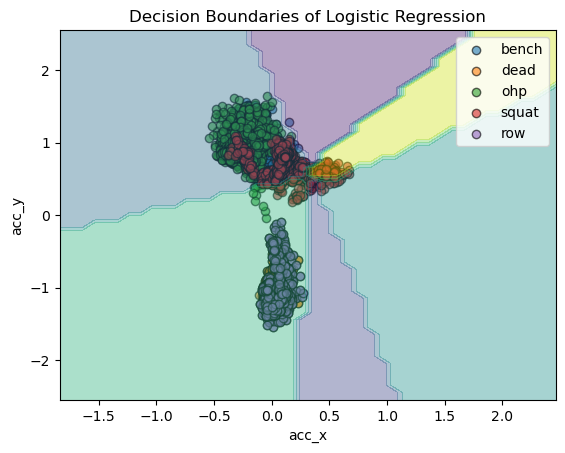

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

if X.shape[1] == 2:
    plt.scatter(X[y=='bench']['acc_x'], X[y=='bench']['acc_y'], label='bench', cmap='viridis', edgecolors='k', alpha=0.6)
    plt.scatter(X[y=='dead']['acc_x'], X[y=='dead']['acc_y'], label='dead', cmap='viridis', edgecolors='k', alpha=0.6)
    plt.scatter(X[y=='ohp']['acc_x'], X[y=='ohp']['acc_y'], label='ohp', cmap='viridis', edgecolors='k', alpha=0.6)
    plt.scatter(X[y=='squat']['acc_x'], X[y=='squat']['acc_y'], label='squat', cmap='viridis', edgecolors='k', alpha=0.6)
    plt.scatter(X[y=='row']['acc_x'], X[y=='row']['acc_y'], label='row', cmap='viridis', edgecolors='k', alpha=0.6)
    
    coef = model.coef_
    intercept = model.intercept_

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel('acc_x')
    plt.ylabel('acc_y')
    plt.title('Decision Boundaries of Logistic Regression')
    plt.legend()
    plt.show()
else:
    print("Visualization not applicable for multi-dimensional data.")


In [25]:
modified_df = pd.read_csv('../data/interim/lr_data.csv')

X = modified_df[['acc_x']]  
y = modified_df['acc_y']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.7401957937418863
R^2 Score: 0.106425823403129


Linear Equation:
acc_y = -1.10 * acc_x + 0.11


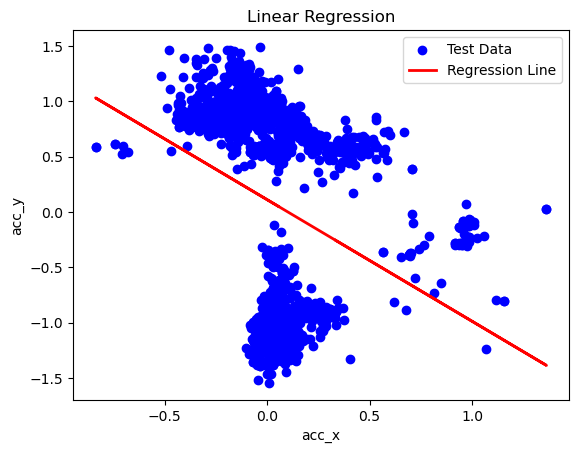

In [26]:
print("Linear Equation:")
print("acc_y = {:.2f} * acc_x + {:.2f}".format(model.coef_[0], model.intercept_))

plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('acc_x')
plt.ylabel('acc_y')
plt.title('Linear Regression')
plt.legend()
plt.show()